Ali Chehab (amc33)
Mahdi Al Zein (mfe24)
Tia Charaf (tac04)

## Imports

In [ ]:
# note, we are in the content directory for future use with colab
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from keras import Sequential
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import os.path
import gdown
import sklearn.metrics

## Data 

### Downloading or Uploading The File

In [ ]:
# checks if the file exists and downloads it from a public link if not
import os.path
import gdown
if( not os.path.isfile('./HIGGS_train.csv')):
  print('CSV file not found. Downloading it for current session.')
  url = 'https://drive.google.com/uc?id=1_odqKcHQw4_363i2N2Iq_ec8-8qlW3DM'
  output = 'HIGGS_train.csv'
  gdown.download(url, output, quiet=False)

CSV file not found. Downloading it for current session.


Downloading...
From: https://drive.google.com/uc?id=1_odqKcHQw4_363i2N2Iq_ec8-8qlW3DM
To: /content/HIGGS_train.csv
100%|██████████| 161M/161M [00:03<00:00, 48.7MB/s]


### Cleaning the data 

-0.11733266237216877


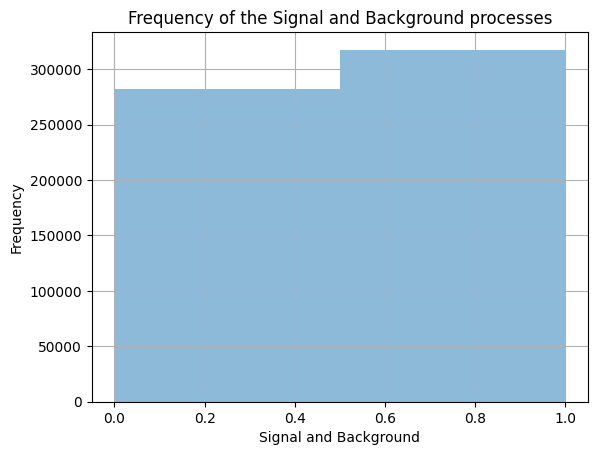

In [ ]:
df = pd.read_csv(r'HIGGS_train.csv', low_memory=False) # gives mixed types error by default

#Dropping the missing rows and rows that have errors / can not be converted to floats
df = df.apply(pd.to_numeric, errors='coerce').dropna()

y = df.iloc[:, 0].values # first column is the actual nature of the observation
X = df.iloc[:, 1:].values # all the features on which the output is based
print(skew(y, bias=False))# value of a skeweness of the data 
df = pd.DataFrame(y) # Create a pandas DataFrame out of the numpy array
df.plot.hist(alpha=0.5, bins=2, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Signal and Background")
plt.title("Frequency of the Signal and Background processes")
plt.show()

### Splitting the data 

In [ ]:
X = np.asarray(X).astype('float32')# convert the matrix we have into a numpy array 

# split the data we have into training and testing (80% training and 20% testing )
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)

#Neural Networks:




### Model Nb 1: 

In [ ]:
# create the model which would consist of 3 layers 
layer1 = Dense(units = 15, activation = 'relu')
layer2 = Dense(units = 3, activation = 'relu')
layer3 = Dense(units = 1, activation = 'sigmoid')

model = Sequential([layer1,layer2,layer3])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
Model1=model.fit(X, y, batch_size=50 ,validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model1.history['accuracy'])
plt.plot(Model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# the Ouput we got: loss: 0.5423 - accuracy: 0.7216
# The model accuracy and loss didn't fluctuate, however eventhough the accuracy could be better the loss is relatively high 
# Note that this model took 55 minutes and 32 seconds to run 


### Model Nb 2 



In [ ]:

# create the model which would consist of 2 layers 
layer1 = Dense(units = 40, activation = 'sigmoid')
layer2 = Dense(units = 3, activation = 'tanh')

model = Sequential([layer1,layer2])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# This builds the model for the first time:
Model2=model.fit(X, y, batch_size=50, validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model2.history['accuracy'])
plt.plot(Model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model2.history['loss'])
plt.plot(Model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# decreasing the number of layers lead to a loss of 3.164 and an accuracy of 0.4265 with huge fluctuations during training.
# This means that the model was too simple and we shall try to opposite approach
# Note that this model took 47 min to run, expected as the number of layers and neurons have decreased the runtime should decrease as well 

Epoch 1/100
1868/9600 [====>.........................] - ETA: 14s - loss: 8.1662 - accuracy: 0.4880

KeyboardInterrupt: ignored

### Model Nb 3

Epoch 1/100
7680/7680 [==============================] - 21s 3ms/step - loss: 0.6409 - accuracy: 0.6261 - val_loss: 0.6069 - val_accuracy: 0.6654
Epoch 2/100
7680/7680 [==============================] - 20s 3ms/step - loss: 0.6150 - accuracy: 0.6630 - val_loss: 0.5965 - val_accuracy: 0.6796
Epoch 3/100
7680/7680 [==============================] - 24s 3ms/step - loss: 0.5927 - accuracy: 0.6828 - val_loss: 0.5823 - val_accuracy: 0.6921
Epoch 4/100
7680/7680 [==============================] - 20s 3ms/step - loss: 0.5818 - accuracy: 0.6919 - val_loss: 0.5778 - val_accuracy: 0.6966
Epoch 5/100
7680/7680 [==============================] - 20s 3ms/step - loss: 0.5754 - accuracy: 0.6973 - val_loss: 0.5688 - val_accuracy: 0.7021
Epoch 6/100
7680/7680 [==============================] - 22s 3ms/step - loss: 0.5694 - accuracy: 0.7016 - val_loss: 0.5697 - val_accuracy: 0.7015
Epoch 7/100
7680/7680 [==============================] - 20s 3ms/step - loss: 0.5683 - accuracy: 0.7029 - val_loss: 0.5628 -

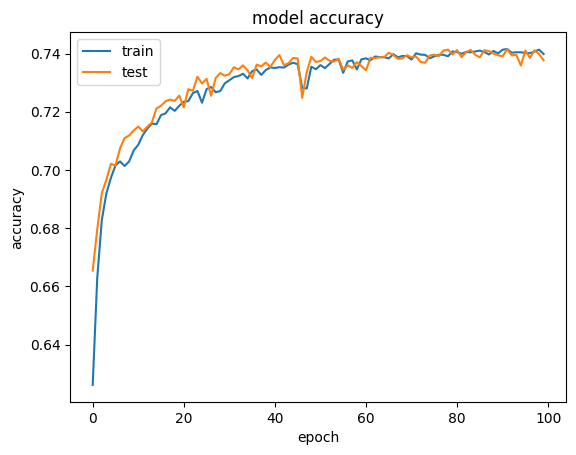

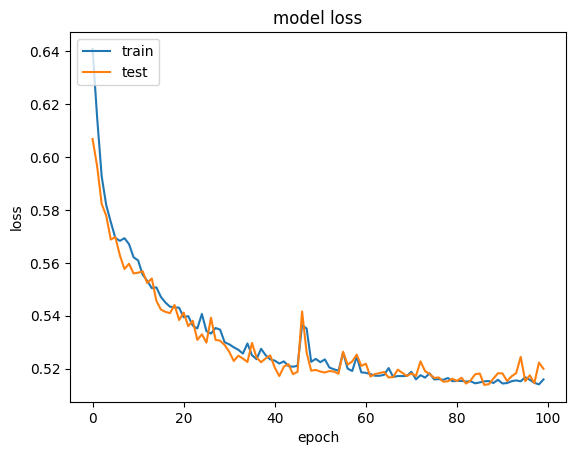

In [ ]:

# create the model which would consist of 4 layers 
layer1 = Dense(units = 30, activation = 'relu')
layer2 = Dense(units = 30, activation = 'sigmoid')
layer3 = Dense(units = 10, activation = 'relu')
layer4 = Dense(units = 1, activation = 'tanh')

model = Sequential([layer1,layer2,layer3,layer4])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
y_train = y_train.reshape((-1,1))

Model3=model.fit(X, y, batch_size=50,validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model3.history['accuracy'])
plt.plot(Model3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model3.history['loss'])
plt.plot(Model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss: 0.5219 - accuracy: 0.7382 
# runtime: 58 minutes 

### Model Nb 4 

In [ ]:
#Model Nb 4
# create the model which would consist of 3 layers 
layer1 = Dense(units = 28, activation = 'relu')
layer2 = Dense(units = 15, activation = 'sigmoid')
layer3 = Dense(units = 4, activation = 'sigmoid')

model4 = Sequential([layer1,layer2,layer3])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
Model4 = model.fit(X, y,batch_size=50 , validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model4.history['accuracy'])
plt.plot(Model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model4.history['loss'])
plt.plot(Model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

### Model Nb 5

In [ ]:
# Model Nb 5 
# A more dense model with simpler/less varying activation list
layer1 = Dense(units = 40, activation = 'relu')
layer2 = Dense(units = 30, activation = 'relu')
layer3 = Dense(units = 10, activation = 'relu')
layer4 = Dense(units = 1, activation = 'sigmoid')

model = Sequential([layer1,layer2,layer3,layer4])

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
Model5 = model.fit(X, y,batch_size=50, validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model5.history['accuracy'])
plt.plot(Model5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model5.history['loss'])
plt.plot(Model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# the Ouput we got: loss: 0.506 - accuracy: 0.745 - val_loss: 0.5107 - val_accuracy: 0.7428 

### Model Nb 6

In [ ]:
# Model Nb 6
# A more dense model with simpler/less varying activation list
layer1 = Dense(units = 300, activation = 'tanh')
layer2 = Dense(units = 300, activation = 'tanh')
layer3 = Dense(units = 300, activation = 'tanh')
layer4 = Dense(units = 300, activation = 'tanh')
layer5 = Dense(units = 1, activation = 'sigmoid')

model = Sequential([layer1,layer2,layer3,layer4,layer5])

opt = SGD(lr=0.05, decay=1e-5)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
Model6 = model.fit(X, y, batch_size=50 ,validation_split=0.2, epochs=200)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model6.history['accuracy'])
plt.plot(Model6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model6.history['loss'])
plt.plot(Model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# this model is definetly overfitting 
# took approx 1 hour to run  

In [ ]:
# save with pickle
pickle.dump(model, open('model.pkl', 'wb'))

### Final Model Nb 7

Loss and Accuracy Graphs

Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


9600/9600 [==============================] - 25s 3ms/step - loss: 0.6646 - accuracy: 0.5877 - val_loss: 0.6345 - val_accuracy: 0.6364
Epoch 2/100
9600/9600 [==============================] - 24s 3ms/step - loss: 0.6180 - accuracy: 0.6550 - val_loss: 0.6001 - val_accuracy: 0.6745
Epoch 3/100
9600/9600 [==============================] - 26s 3ms/step - loss: 0.5958 - accuracy: 0.6769 - val_loss: 0.5878 - val_accuracy: 0.6870
Epoch 4/100
9600/9600 [==============================] - 24s 3ms/step - loss: 0.5856 - accuracy: 0.6859 - val_loss: 0.5845 - val_accuracy: 0.6872
Epoch 5/100
9600/9600 [==============================] - 25s 3ms/step - loss: 0.5788 - accuracy: 0.6914 - val_loss: 0.5732 - val_accuracy: 0.6966
Epoch 6/100
9600/9600 [==============================] - 24s 3ms/step - loss: 0.5735 - accuracy: 0.6958 - val_loss: 0.5720 - val_accuracy: 0.6979
Epoch 7/100
9600/9600 [==============================] - 25s 3ms/step - loss: 0.5689 - accuracy: 0.7001 - val_loss: 0.5683 - val_accurac

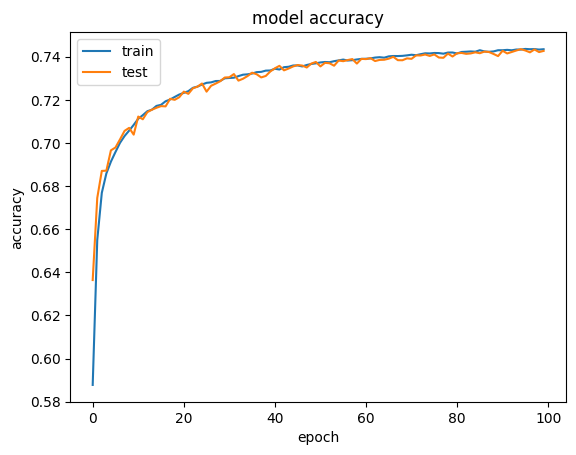

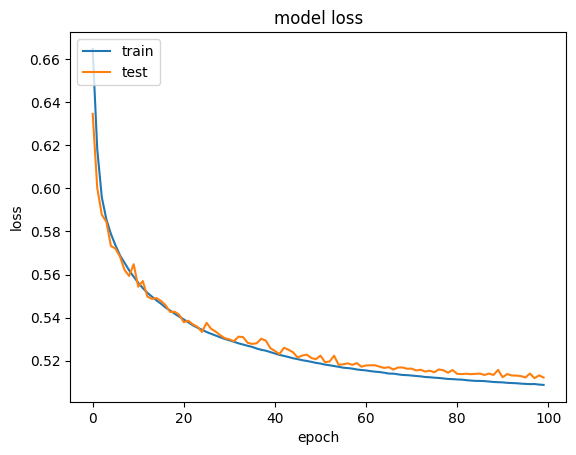

In [ ]:
# Model Nb 7
# A more dense model with simpler/less varying activation list
layer1 = Dense(units = 28, activation = 'relu')
layer2 = Dense(units = 28, activation = 'relu')
layer3 = Dense(units = 28, activation = 'relu')
layer4 = Dense(units = 28, activation = 'relu')
layer5 = Dense(units = 28, activation = 'relu')
layer6 = Dense(units = 1, activation = 'sigmoid')

model = Sequential([layer1,layer2,layer3,layer4,layer5,layer6])

opt = SGD(lr=0.02, decay=1e-5)
model.compile(optimizer=opt,loss='binary_crossentropy', metrics=['accuracy'])
# This builds the model for the first time:
Model7 = model.fit(X, y, batch_size=50,validation_split=0.2, epochs=100)
# To find the loss and accuracy of the model:
loss_best,accuracy_best=model.evaluate(X_test,y_test)

# summarize history for accuracy
plt.plot(Model7.history['accuracy'])
plt.plot(Model7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(Model7.history['loss'])
plt.plot(Model7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# the Ouput we got: loss: 0.5088 - accuracy: 0.7435 - val_loss: 0.5122 - val_accuracy: 0.7427
# took 42 minutes to run 

ROC Curve

18750/18750 [==============================] - 29s 2ms/step
Model 7 AUC score: 0.7437067570813307


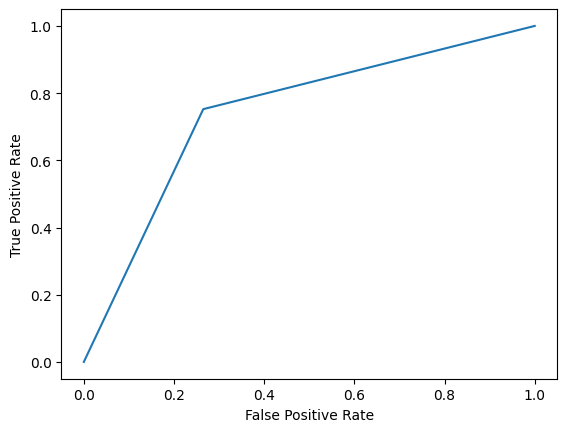

In [ ]:
# return a value of 1 if the predicted value is greater than 0.5 
y_pred_proba=(model.predict(X) > 0.5).astype("int32")
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
print(f'Model 7 AUC score: {roc_auc_score(y, y_pred_proba)}')
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# AUC = 0.7437067570813307

Confusion Matrix

In [ ]:
r = sklearn.metrics.confusion_matrix(y, y_pred_proba)
print(r)

[[207619  74809]
 [ 78664 238903]]


# Gradient Boosting Classifier

### GBC Model Nb 1 

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=0.01, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc1=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc1.score(X_test, y_test)
# Accuracy:0.711930932757773
# Runtime:14 minutes

### GBC Model Nb 2

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=0.03, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc2=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc2.score(X_test, y_test)
# Accuracy:0.7246227051892099
# Runtime = 14 minutes 

### GBC Model Nb 3

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=0.1, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc3=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc3.score(X_test, y_test)
# Accuracy:0.7322477687314061

### GBC Model Nb 4

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=0.3, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc3=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc3.score(X_test, y_test)
# Accuracy: 0.7338144484537371
# Runtime: 10 minutes

### GBC Model Nb 5

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=1, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc4=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc4.score(X_test, y_test)
# Accuracy: 0.7151309594246619
# Runtime: 10 mintues 

### GBC Model Nb 6

In [ ]:
# Gradient Boosting Classifier 
gradient_booster = GradientBoostingClassifier(learning_rate=3, n_estimators= 500, max_depth = 5,subsample= 0.98, min_samples_split= 20, max_features= 6)
gbc4=gradient_booster.fit(X_train,y_train)
print(classification_report(y_test,gradient_booster.predict(X_test)))
gbc4.score(X_test, y_test)
# Accuracy: 0.5391211593429945
# Runtime: 14 minutes